# **About the Project**

In this project we will be using NLP to preprocess the text inside resume and segregate resumes based on domain. As this is a classification task, we will be using word embedding technique to transform raw text into numerical features. Based on these features final predictions will be performed.

# **1. Loading and preprocessing the dataset**

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import os
#!pip install tensorflow==2.1.0
#!pip install keras==2.3.1
%matplotlib inline

#pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [3]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile
zipPATH = '/content/drive/MyDrive/Colab Notebooks/Misc_Resume_Screening/archive_Resume_Screening.zip'

if 'UpdatedResumeDataSet.csv' not in os.listdir('.'):
    with zipfile.ZipFile(zipPATH,"r") as z:
            print(f"Extracting content from archive_Resume_Screening.zip ......")
            z.extractall()
            print(f"Extracted to {os.getcwd()}")
else:
  print("UpdatedResumeDataSet.csv already present")

Extracting content from archive_Resume_Screening.zip ......
Extracted to /content


In [5]:
df = pd.read_csv('UpdatedResumeDataSet.csv',encoding='utf-8')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [7]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [8]:
# Displaying content inside a resume
print(df.loc[1,'Resume'])

Education Details 
May 2013 to May 2017 B.E   UIT-RGPV
Data Scientist 

Data Scientist - Matelabs
Skill Details 
Python- Exprience - Less than 1 year months
Statsmodels- Exprience - 12 months
AWS- Exprience - Less than 1 year months
Machine learning- Exprience - Less than 1 year months
Sklearn- Exprience - Less than 1 year months
Scipy- Exprience - Less than 1 year months
Keras- Exprience - Less than 1 year monthsCompany Details 
company - Matelabs
description - ML Platform for business professionals, dummies and enthusiasts.
60/A Koramangala 5th block,
Achievements/Tasks behind sukh sagar, Bengaluru,
India                               Developed and deployed auto preprocessing steps of machine learning mainly missing value
treatment, outlier detection, encoding, scaling, feature selection and dimensionality reduction.
Deployed automated classification and regression model.
linkedin.com/in/aditya-rathore-
b4600b146                           Reasearch and deployed the time series foreca

In [9]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\d+', ' ', resumeText)  # remove digits 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    resumeText = resumeText.lower()
    return resumeText

In [10]:
df['cleaned_resume'] = df["Resume"].apply(cleanResume)

In [11]:
# Displaying content inside a resume
print(df.loc[1,'cleaned_resume'])

education details may to may b e uit rgpv data scientist data scientist matelabs skill details python exprience less than year months statsmodels exprience months aws exprience less than year months machine learning exprience less than year months sklearn exprience less than year months scipy exprience less than year months keras exprience less than year monthscompany details company matelabs description ml platform for business professionals dummies and enthusiasts a koramangala th block achievements tasks behind sukh sagar bengaluru india developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction deployed automated classification and regression model linkedin com in aditya rathore b b reasearch and deployed the time series forecasting model arima sarimax holt winter and prophet worked on meta feature extracting problem github com rathorology implemented a state of

# **2. Performing EDA**

## **a) Checking Target Class Distribution**

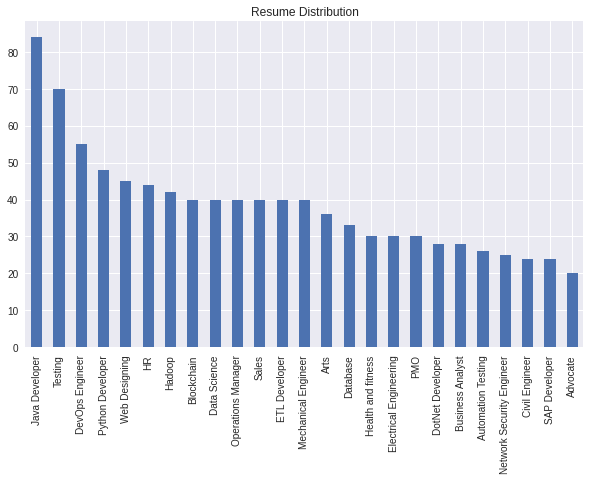

In [12]:
plt.figure(figsize=(10,6))
df['Category'].value_counts().plot(kind="bar")
plt.title("Resume Distribution")
plt.show()

## **b) Creating Wordcloud**

In [13]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
def word_cloud(domain):
  sentences = df[df['Category']==domain]['cleaned_resume'].tolist()
  words = []
  for sentence in sentences:
    word_tokens = word_tokenize(sentence)
    words = [word for word in word_tokens if word not in stopwords.words('english')]

  '''
  wordfreqdist = nltk.FreqDist(words)
  mostcommon = wordfreqdist.most_common(50)
  print(mostcommon)
  '''
  cleaned_text = " ".join(words)
  wc = WordCloud().generate(cleaned_text)
  plt.figure(figsize=(15,15))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.show()

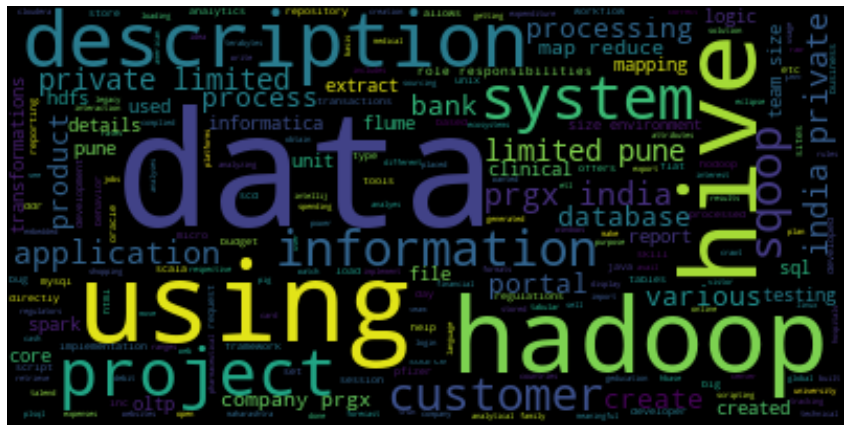

In [15]:
word_cloud('Hadoop')

# **3. Data Preparation**

## **a) Train-Test Split**

In [16]:
from sklearn.model_selection import train_test_split

X = df['cleaned_resume']
y = df['Category']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0, test_size=0.2, stratify=y)
print("Train Shape :", X_train.shape)
print("Test Shape :", X_test.shape)

Train Shape : (769,)
Test Shape : (193,)


## **b) Word Embedding**

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)

X_train_vec = word_vectorizer.fit_transform(X_train)
X_test_vec = word_vectorizer.transform(X_test)
print("Train vector :",X_train_vec.shape)
print("Test vector :",X_test_vec.shape)

Train vector : (769, 1500)
Test vector : (193, 1500)


# **4. Model Building and Evaluation**

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.98
-----------------------------------------------------
Confusion Matrix: 


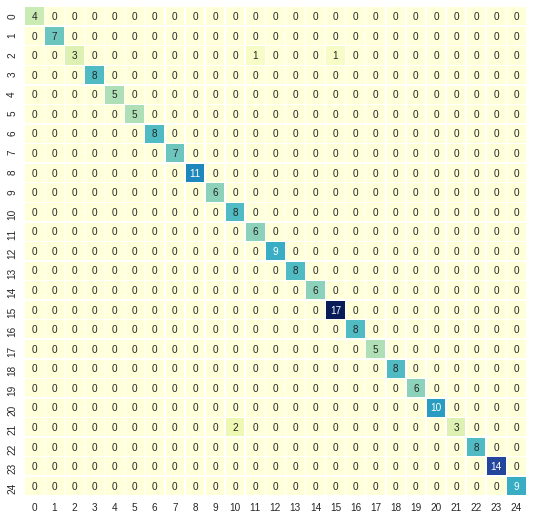

-----------------------------------------------------

 Classification report: 
                            precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       1.00      0.60      0.75         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         5
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      1.00      1.00        11
         DotNet Developer       1.00      1.00      1.00         6
            ETL Developer       0.80      1.00      0.89         8
   Electrical Engineering       0.86      1.00      0.92         6
                       HR       1.00      1.00 

In [42]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = KNeighborsClassifier()
clf.fit(X_train_vec, y_train)
prediction = clf.predict(X_test_vec)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train_vec, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test_vec, y_test)))
print("-----------------------------------------------------")
print("Confusion Matrix: ")
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test,prediction),linewidths=.5,cmap="YlGnBu",annot=True,cbar=False,fmt='d',xticklabels=X.)
plt.show()
print("-----------------------------------------------------")
print(f"\n Classification report: \n {classification_report(y_test, prediction)}")

**Reference:**

- <a href="https://thecleverprogrammer.com/2020/12/06/resume-screening-with-python/">Resume Segmentation</a>
- <a href="https://towardsdatascience.com/do-the-keywords-in-your-resume-aptly-represent-what-type-of-data-scientist-you-are-59134105ba0d">Resume Screening</a>
- <a href="https://thecleverprogrammer.com/2020/07/21/pipelines-in-machine-learning/">Pipelines</a>
- <a href="https://machinelearningmastery.com/types-of-classification-in-machine-learning/">Classification Techniques</a>
- <a href="https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/">Stacking</a>
